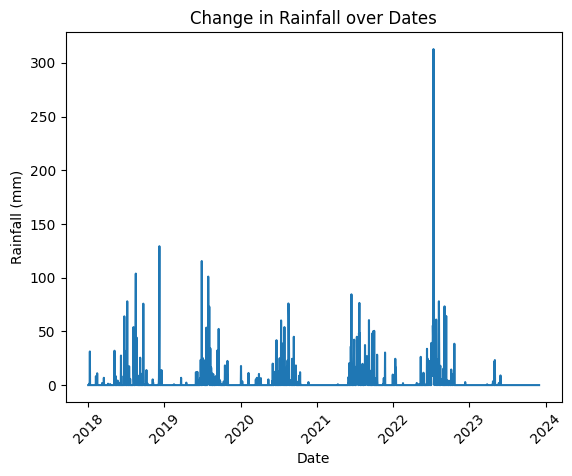

Predicted Future Rainfall:
        Date  Rainfall (mm)
0 2023-07-05       3.715817
1 2023-07-06       3.716252
2 2023-07-07       3.716687
3 2023-07-08       3.717122
4 2023-07-09       3.717557


In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the CSV data
data = pd.read_csv('pre_final.csv')

# Filter the data based on district and mandal
district = 'Adilabad'
mandal = 'Adilabad Rural'
filtered_data = data[(data['District'] == district) & (data['Mandal'] == mandal)]

# Convert the 'Date' column to datetime format
filtered_data['Date'] = pd.to_datetime(filtered_data['Date'])

# Sort the data by date
filtered_data = filtered_data.sort_values(by='Date')

# Plotting the change in rainfall over dates
plt.plot(filtered_data['Date'], filtered_data['Rainfall (mm)'])
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.title('Change in Rainfall over Dates')
plt.xticks(rotation=45)
plt.show()

# Prepare the data for future rainfall prediction
X = pd.to_numeric(filtered_data['Date']).values.reshape(-1, 1)
y = filtered_data['Rainfall (mm)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict future rainfall
future_dates = pd.date_range(start='2023-07-05', periods=5, freq='D')  # Adjust the future date range as needed
future_dates_numeric = pd.to_numeric(future_dates).values.reshape(-1, 1)
future_rainfall = model.predict(future_dates_numeric)

# Display the predicted future rainfall
future_data = pd.DataFrame({'Date': future_dates, 'Rainfall (mm)': future_rainfall})
print('Predicted Future Rainfall:')
print(future_data)


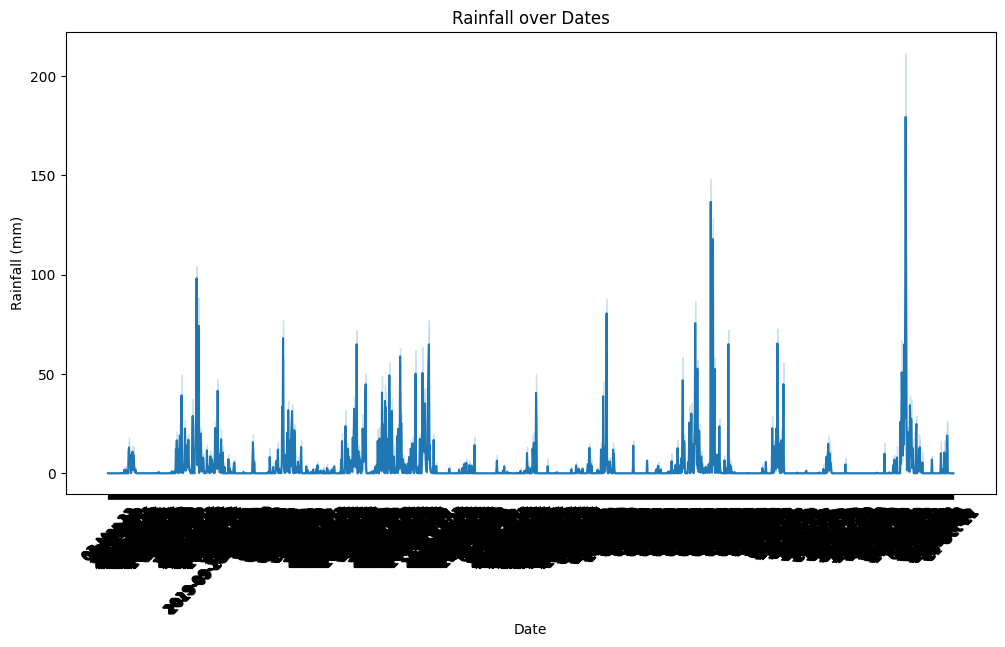

In [2]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=data['Date'], y=data['Rainfall (mm)'])
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.title('Rainfall over Dates')
plt.xticks(rotation=45)
plt.show()

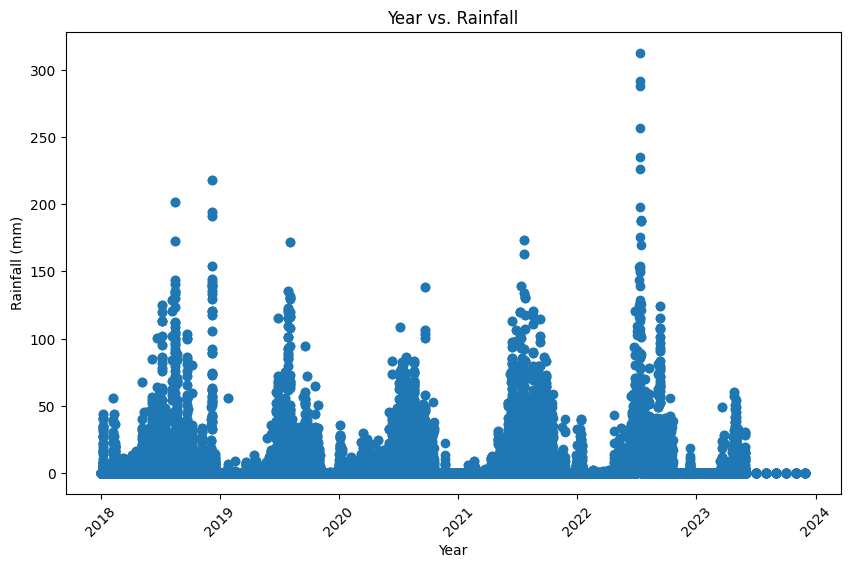

In [3]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract the year from the date
data['Year'] = data['Date'].dt.year

# Scatter plot of year vs. rainfall
plt.figure(figsize=(10, 6))
plt.scatter(data['Date'], data['Rainfall (mm)'])
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.title('Year vs. Rainfall')
plt.xticks(rotation=45)
plt.show()